In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

C:\Users\thoma\AppData\Local\Temp\ipykernel_104144\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir='data-1'

In [8]:
image_exts =['jpeg','jpg','bmp','png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

# load data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 999 files belonging to 10 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

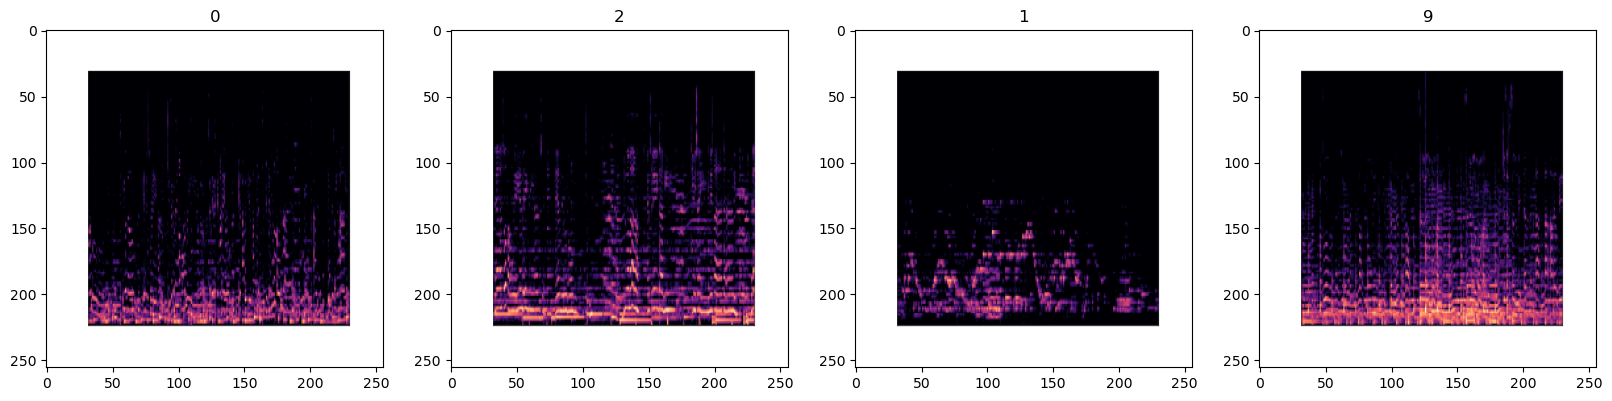

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
batch[1]

array([0, 2, 1, 9, 5, 1, 6, 8, 0, 5, 3, 6, 5, 4, 1, 4, 9, 9, 7, 8, 2, 3,
       7, 2, 0, 8, 9, 5, 5, 4, 8, 6])

# 4.Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

# 5.Split Data

In [19]:
len(data)

32

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [21]:
train_size+val_size+test_size

32

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)           

# 7.Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 [==============================] - 86s 4s/step - loss: 2.9903 - accuracy: 0.1335 - val_loss: 2.2173 - val_accuracy: 0.2917
Epoch 2/20
22/22 [==============================] - 76s 3s/step - loss: 2.1202 - accuracy: 0.2642 - val_loss: 1.9860 - val_accuracy: 0.3333
Epoch 3/20
22/22 [==============================] - 75s 3s/step - loss: 1.7799 - accuracy: 0.3949 - val_loss: 1.5836 - val_accuracy: 0.3854
Epoch 4/20
22/22 [==============================] - 78s 3s/step - loss: 1.3793 - accuracy: 0.5426 - val_loss: 1.2679 - val_accuracy: 0.5729
Epoch 5/20
22/22 [==============================] - 76s 3s/step - loss: 1.0346 - accuracy: 0.6562 - val_loss: 1.1155 - val_accuracy: 0.5990
Epoch 6/20
22/22 [==============================] - 77s 3s/step - loss: 0.7865 - accuracy: 0.7699 - val_loss: 0.8560 - val_accuracy: 0.7448
Epoch 7/20
22/22 [==============================] - 77s 3s/step - loss: 0.5151 - accuracy: 0.8622 - val_loss: 0.9451 - val_accuracy: 0.6771
Epoch 8/20
22/22 [==

# 8.Performance

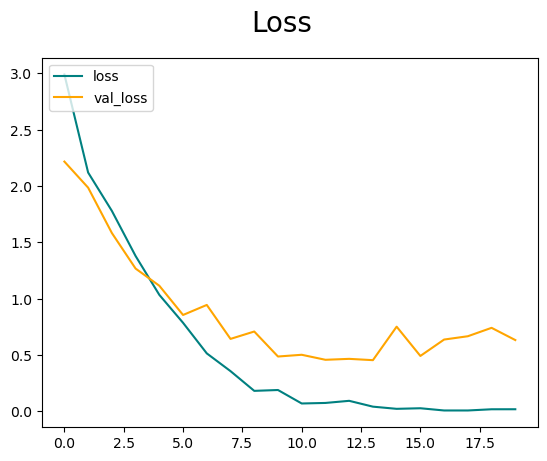

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

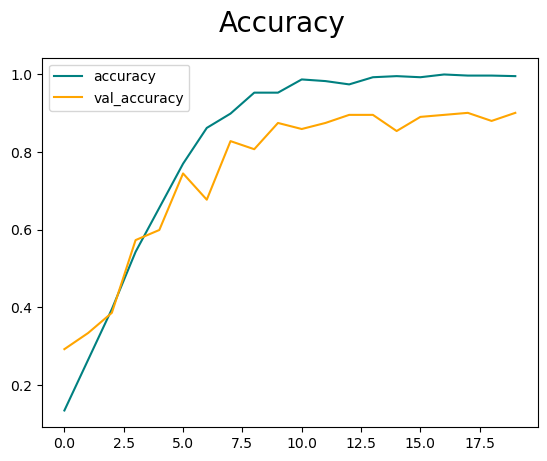

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9.Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10.Test

In [37]:
import cv2

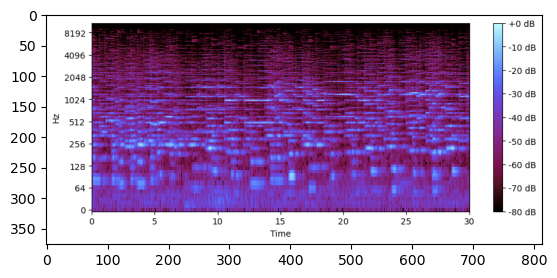

In [38]:
img = cv2.imread("data-1/classical/classical.00001_spectrogram.png")
plt.imshow(img)
plt.show()

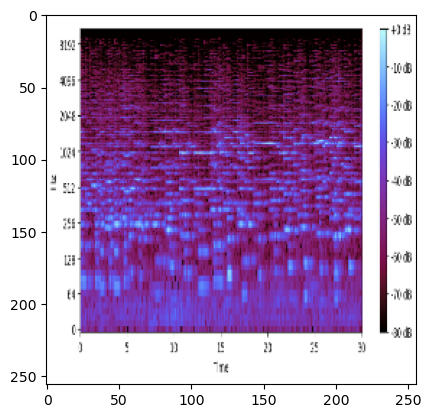

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 327ms/step


In [41]:
yhat

array([[6.5822707e-07, 6.0505767e-10, 1.4935993e-06, 5.7629040e-03,
        5.0113020e-03, 1.8745126e-07, 4.1486477e-03, 9.8288202e-01,
        2.0758219e-03, 1.1692243e-04]], dtype=float32)

In [42]:
if yhat < 0.10:
    print(f'Predicted class is BLUES')
elif yhat < 0.20:
    print(f'Predicted class is CLASSICAL')
elif yhat < 0.30:
    print(f'Predicted class is COUNTRY')
elif yhat < 0.40:
    print(f'Predicted class is DISCO')
elif yhat < 0.50:
    print(f'Predicted class is HIP HOP')
elif yhat < 0.60:
    print(f'Predicted class is JAZZ')
elif yhat < 0.70:
    print(f'Predicted class is METAL')
elif yhat < 0.80:
    print(f'Predicted class is POP')
elif yhat < 0.90:
    print(f'Predicted class is REGGAE')
else:
    print(f'Predicted class is ROCK')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# export

In [44]:
from tensorflow.keras.models import save_model

model.save('imageclass.keras')

# Test

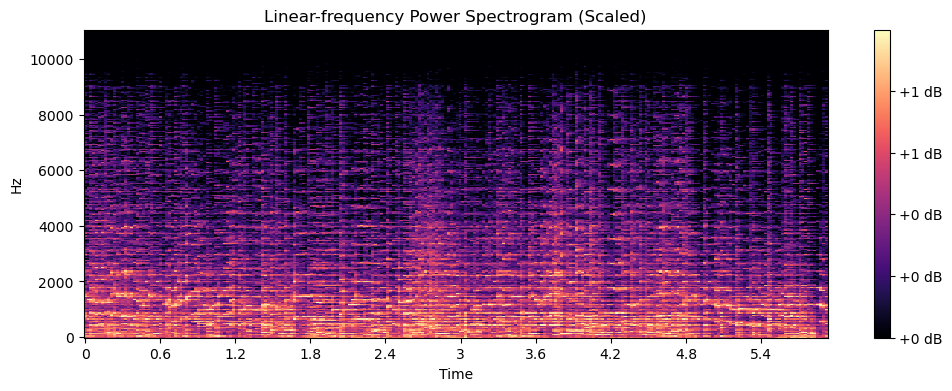

1/1 [==============================] - 0s 258ms/step
Predicted Label: Reggae


In [46]:
import cv2
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load the trained model
model = load_model('imageclass.keras')  # Replace with the actual path to your model

# Load the external audio file
external_audio_path = 'genres_original/classical/classical.00000.wav'  # Replace with the actual path to your audio file
y, sr = librosa.load(external_audio_path)

# Convert the external audio to a spectrogram
spectrogram = np.abs(librosa.stft(y))
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)  # Convert to dB scale
spectrogram = np.expand_dims(spectrogram, axis=-1)  # Add a channel dimension
spectrogram = np.expand_dims(spectrogram, axis=0)  # Add a batch dimension

# Scale the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
spectrogram_scaled = scaler.fit_transform(spectrogram[0, :, :, 0])

# Reshape to match the target shape
spectrogram_scaled = spectrogram_scaled.reshape(1, spectrogram_scaled.shape[0], spectrogram_scaled.shape[1], 1)

# Resize the entire spectrogram using cv2.resize
target_shape = model.input_shape[1:-1]
dsize = (target_shape[1], target_shape[0])  # Ensure non-zero values and swap height and width
spectrogram_resized = cv2.resize(spectrogram_scaled[0, :, :, 0], dsize, interpolation=cv2.INTER_LINEAR)
spectrogram_resized = np.expand_dims(spectrogram_resized, axis=-1)  # Add the channel dimension back
spectrogram_resized = np.repeat(spectrogram_resized, 3, axis=-1)  # Repeat the single channel to create three identical channels

# Visualize the resized linear-frequency power spectrogram with a different colormap
plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram_resized[:, :, 0], sr=sr, x_axis='time', y_axis='linear', cmap='magma')  # Change 'magma' to your desired colormap
plt.colorbar(format='%+2.0f dB')
plt.title("Linear-frequency Power Spectrogram (Scaled)")
plt.show()

# Make predictions using the loaded model
predictions = model.predict(np.expand_dims(spectrogram_resized, axis=0))

# Assuming you have a list of class labels, you can get the predicted label
class_labels = ['Blue', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock']
predicted_label = class_labels[np.argmax(predictions)]

print(f"Predicted Label: {predicted_label}")


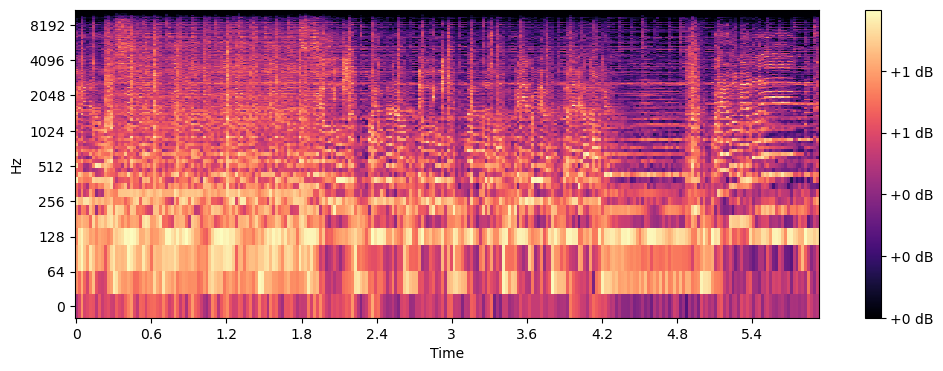

1/1 [==============================] - 0s 199ms/step
Predicted Label: Blue


In [51]:
import cv2
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load the trained model
model = load_model('imageclass.keras')  # Replace with the actual path to your model

# Load the external audio file
external_audio_path = 'genres_original/classical/classical.00029.wav'  # Replace with the actual path to your audio file
y, sr = librosa.load(external_audio_path)

# Calculate the spectrogram for the external audio
spectrogram = np.abs(librosa.stft(y))
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)  # Convert to dB scale
spectrogram = np.expand_dims(spectrogram, axis=-1)  # Add a channel dimension
spectrogram = np.expand_dims(spectrogram, axis=0)  # Add a batch dimension

# Scale the spectrogram features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
spectrogram_scaled = scaler.fit_transform(spectrogram[0, :, :, 0])


# Visualize the resized linear-frequency power spectrogram with a different colormap
plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram_resized[:, :, 0], sr=sr, x_axis='time', y_axis='log')  # Change 'magma' to your desired colormap
plt.colorbar(format='%+2.0f dB')
plt.show()

# Reshape to match the target shape
spectrogram_scaled = spectrogram_scaled.reshape(1, spectrogram_scaled.shape[0], spectrogram_scaled.shape[1], 1)

# Resize the entire spectrogram using cv2.resize
target_shape = model.input_shape[1:-1]
dsize = (target_shape[1], target_shape[0])  # Ensure non-zero values and swap height and width
spectrogram_resized = cv2.resize(spectrogram_scaled[0, :, :, 0], dsize, interpolation=cv2.INTER_LINEAR)
spectrogram_resized = np.expand_dims(spectrogram_resized, axis=-1)  # Add the channel dimension back
spectrogram_resized = np.repeat(spectrogram_resized, 3, axis=-1)  # Repeat the single channel to create three identical channels

# Make predictions using the loaded model
predictions = model.predict(np.expand_dims(spectrogram_resized, axis=0))

# Assuming you have a list of class labels, you can get the predicted label
class_labels = ['Blue', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock']
predicted_label = class_labels[np.argmax(predictions)]

print(f"Predicted Label: {predicted_label}")
